# Some data analysis on the generated G2 dataset 

In [23]:
import sys, pathlib

PROJECT_ROOT = pathlib.Path.cwd().parent  # LearningG2
sys.path.insert(0, str(PROJECT_ROOT))

print("PROJECT_ROOT:", PROJECT_ROOT)

import matplotlib.pyplot as plt
import numpy as np
import itertools

PROJECT_ROOT: /Users/tomassilva/Desktop/GitHub/LearningG2


In [24]:
data = np.load('../sampling/g2_dataset.npz')

## Vol CY vs. Vol G2

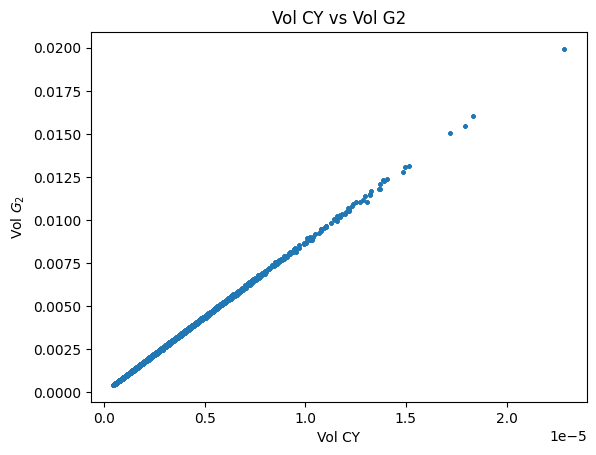

In [27]:
cy_det = np.linalg.det(data["riemannian_metrics"])
g2_det = np.linalg.det(data["g2_metrics"])

plt.plot(cy_det, g2_det, 'o', markersize=2)
plt.xlabel("Vol CY")
plt.ylabel("Vol " + r"$G_2$")
plt.title("Vol CY vs Vol G2")
plt.show()

# 3-form 35 oriented components histogram

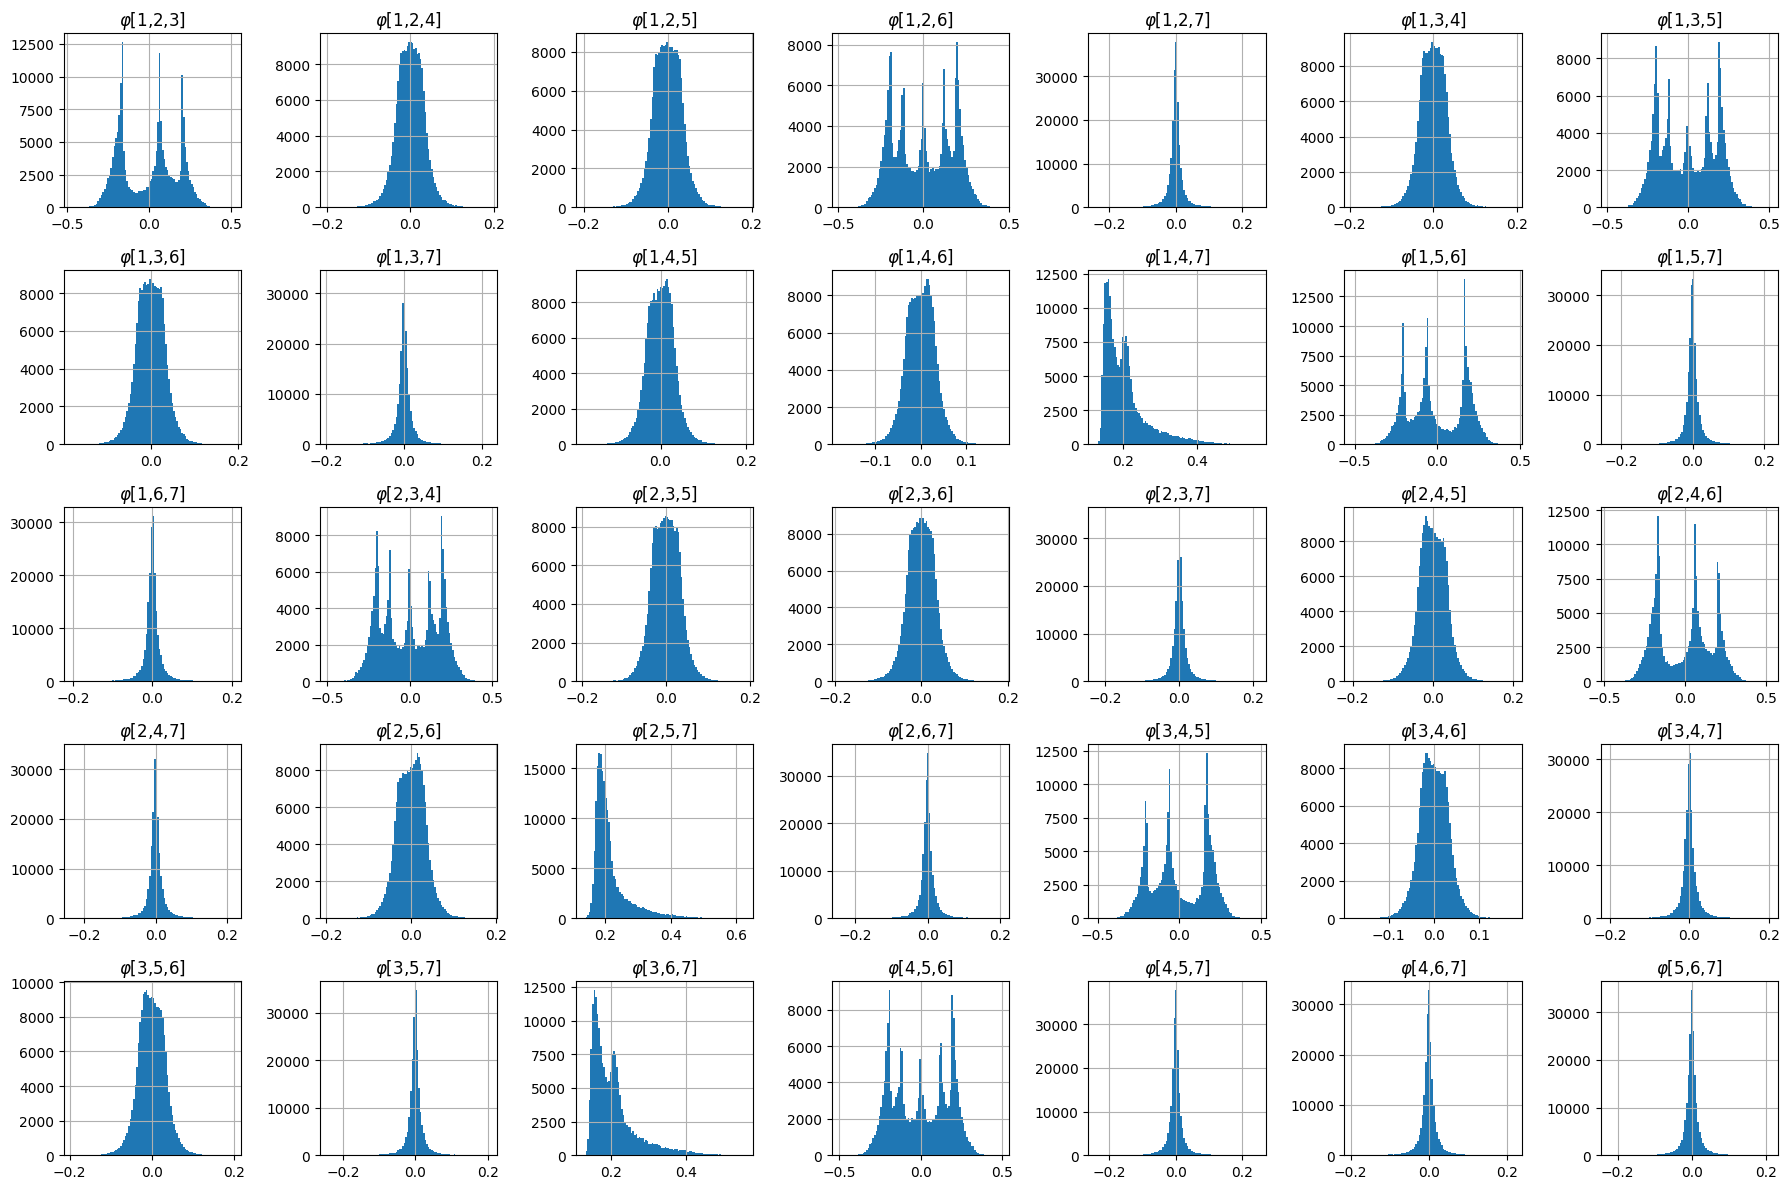

In [28]:
def oriented35_components(T):
    T = np.asarray(T)
    assert T.shape == (7,7,7)
    triples = list(itertools.combinations(range(7), 3))
    vals = np.array([T[i,j,k] for (i,j,k) in triples], dtype=T.dtype)
    return vals

Y = np.array([oriented35_components(phi) for phi in data["phis"]])

def plot_histograms_grid(Y, bins=100, logy=False):
    """
    Y: array of shape (N, 35)
    """
    assert Y.shape[1] == 35

    nrows, ncols = 5, 7  # 5*7 = 35
    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 12))
    axes = axes.flatten()
    indices = list(itertools.combinations(range(7), 3))
    for k in range(35):
        ax = axes[k]
        ax.hist(Y[:, k], bins=bins)
        ax.set_title(r"$\varphi$" + f"[{indices[k][0]+1},{indices[k][1]+1},{indices[k][2]+1}]")
        if logy:
            ax.set_yscale("log")
        ax.grid(True)

    plt.tight_layout()
    plt.show()
    
plot_histograms_grid(Y)

# G2 metric 28 symmetric components histogram

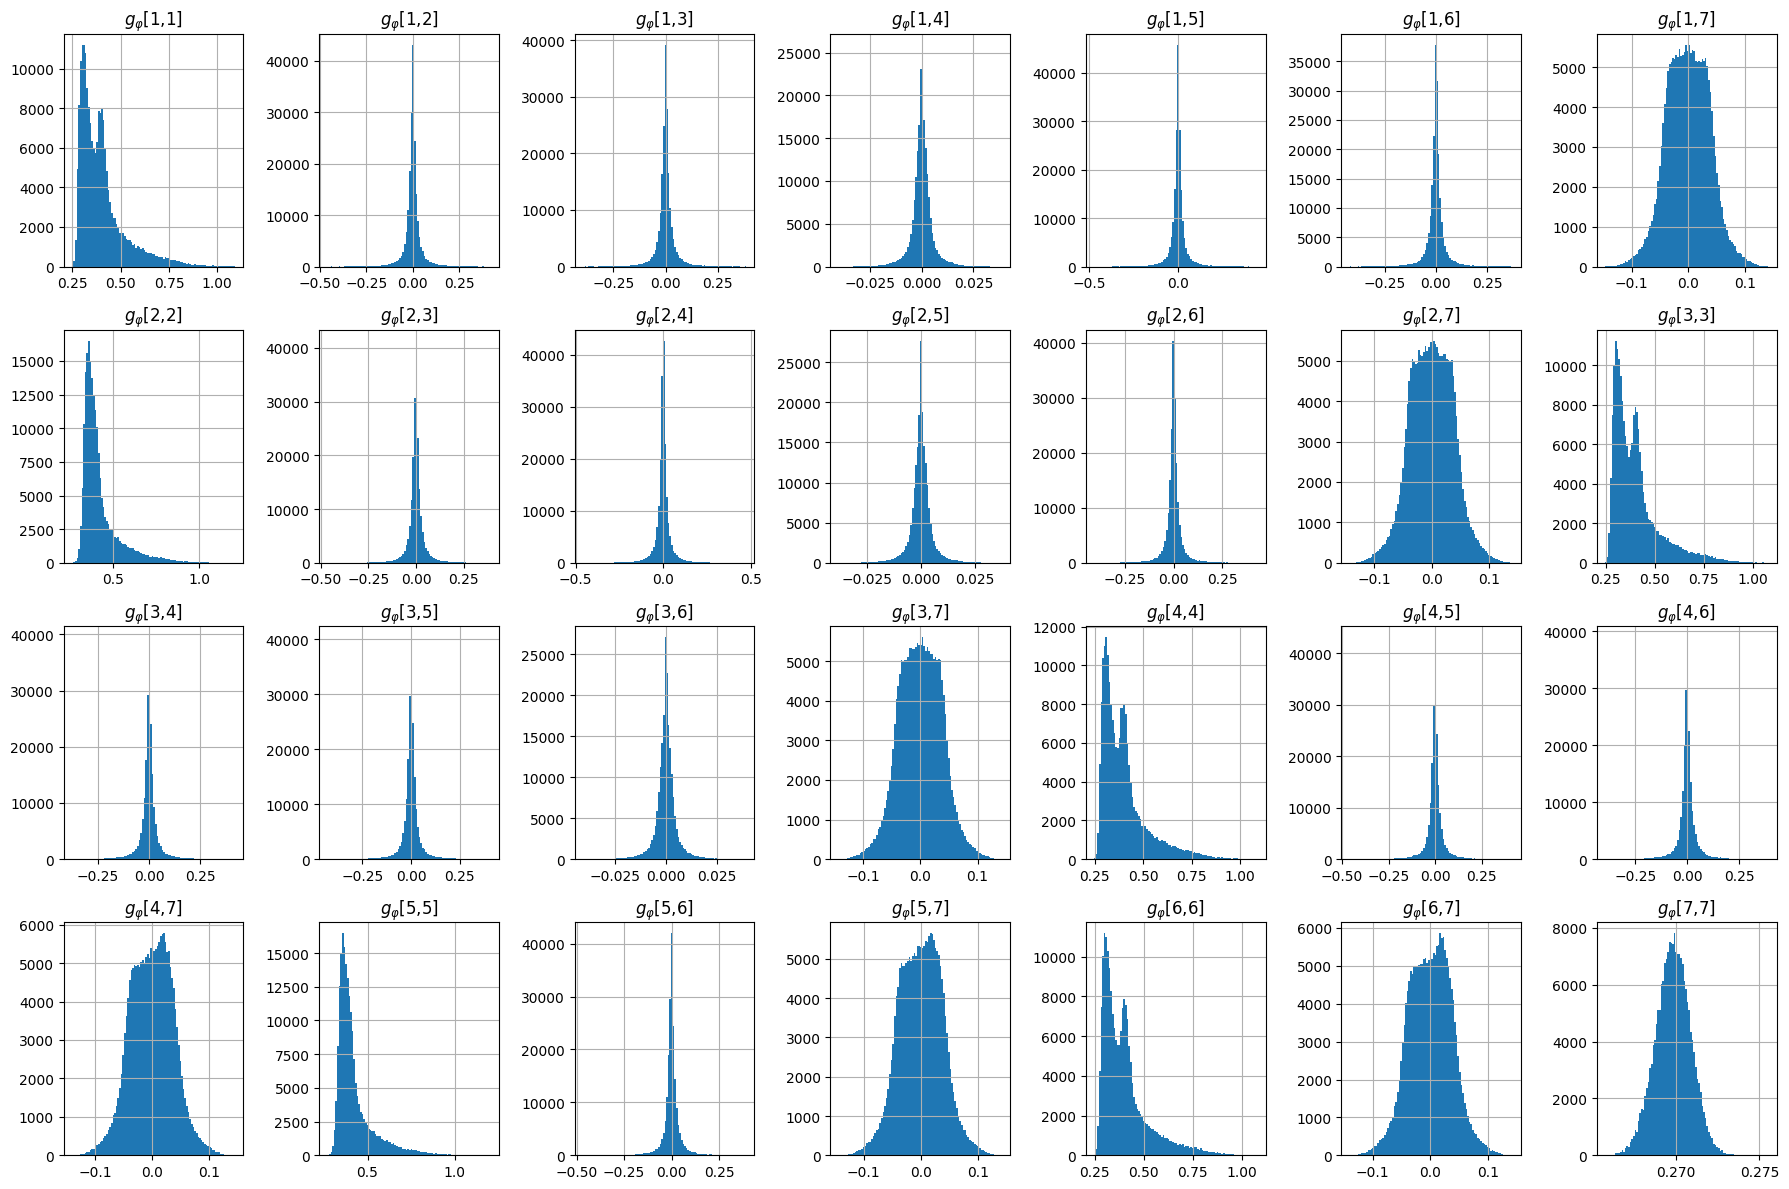

In [29]:
def upper_triangular_part(A, include_diagonal=True):
    """
    Extract the upper triangular part of a 7x7 matrix.

    Parameters
    ----------
    A : array_like, shape (7,7)
        Input matrix.
    include_diagonal : bool
        Whether to include the diagonal entries.

    Returns
    -------
    v : ndarray, shape (28,) if include_diagonal else (21,)
        Upper triangular entries in row-major order.
    """
    A = np.asarray(A)
    assert A.shape == (7, 7), "Input must be a 7x7 matrix"

    if include_diagonal:
        idx = np.triu_indices(7)
    else:
        idx = np.triu_indices(7, k=1)

    return A[idx]

Y = np.array([upper_triangular_part(gg2) for gg2 in data["g2_metrics"]])  # (N, 28)

def plot_histograms_grid(Y, bins=100, logy=False):
    """
    Y: array of shape (N, 28)
    """
    assert Y.shape[1] == 28

    nrows, ncols = 4, 7  # 4*7 = 28
    fig, axes = plt.subplots(nrows, ncols, figsize=(18, 12))
    axes = axes.flatten()
    indices = [(i, j) for i in range(1, 8) for j in range(i, 8)]

    for k in range(28):
        ax = axes[k]
        ax.hist(Y[:, k], bins=bins)
        ax.set_title(r"$g_{\varphi}$" + f"[{indices[k][0]},{indices[k][1]}]")
        if logy:
            ax.set_yscale("log")
        ax.grid(True)

    plt.tight_layout()
    plt.show()
    
plot_histograms_grid(Y)